BERT, Classfication layer

BERT, Classfication layer

In [1]:
name = "bert_final_keywords"

In [2]:
import pandas as pd

def process_dataframes(dataframes):
    """
    Process a list of dataframes to replace specific values in the 'label' column
    and replace underscores with spaces in the 'keywords' column.
    
    Parameters:
        dataframes (list): List of pandas DataFrames to process.
        
    Returns:
        List of processed pandas DataFrames.
    """
    # Define the replacement dictionary for labels
    replacement_dict = {'meniskus-urgent': 'meniscus-urgent', 'meniskus-minor': 'meniscus-minor'}
    
    # Iterate over each dataframe
    for df in dataframes:
        # Replace specific values in the 'label' column
        df['label'] = df['label'].replace(replacement_dict)
        
        # Replace underscores with spaces in the 'keywords' column
        df['keywords'] = df['keywords'].str.replace('_', ' ')
    
    return dataframes

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


train_data = pd.read_csv('../datasets/data_train_2.csv')
test_data = pd.read_csv('../datasets/data_test_2.csv')
valid_data = pd.read_csv('../datasets/data_valid_2.csv')

# Process all dataframes
train_data, test_data, valid_data = process_dataframes([train_data, test_data, valid_data])



all_labels = pd.concat([train_data["label"], test_data["label"], valid_data["label"]])
label_encoder = LabelEncoder()
label_encoder.fit(all_labels)

LabelEncoder()

In [4]:
train_data

,patientid,sex,age,ANA,EXA,DIA_text,DIA_code,OP_text,OP_code,EXA_formatted,EXA_interpreted,label,data,data2,original_data,keywords_prep,keywords
0,69318.0,NaN,NaN,NaN,li. Knie: 0-5-130; kein Erguss; Lachman + unsi...,Verstauchung und Zerrung des Kniegelenkes mit ...,S83.43 Z,Arthroskopische Operation am Gelenkknorpel und...,5-812.6,links knie keine überstreckung des knies strec...,Mein linkes Knie kann nicht überstreckt werden...,other-minor,. Mein linkes Knie kann nicht überstreckt werd...,. Mein linkes Knie kann nicht überstreckt werd...,li. Knie: 0-5-130; kein Erguss; Lachman + u...,. Mein linkes Knie kann nicht_überstreckt werd...,mein linkes knie kann nicht überstreckt werden...
1,10685.0,male,35.0,Geht sehr gut nach LCA-Plastik. Score liegt be...,re Knie: volle Streckung; geringer Erguß; DS ü...,LCA-Plastik-Totalruptur; Svnovialitis; Hoffait...,M23.3-,NaN,NaN,"geringer erguß, druckschmerz über med seite de...",Mein Knie hat einen geringen Erguß und es gibt...,meniscus-urgent,35.0 Jahre alt männlich Geht sehr gut nach LCA...,Geht sehr gut nach LCA-Plastik. Score liegt be...,35.0 male Geht sehr gut nach LCA-Plastik. Scor...,35.0 Jahre alt männlich Geht sehr gut nach LCA...,mein knie hat einen geringen erguß und es gibt...
2,58655.0,male,49.0,Der Patient stellt sich Präop zur Kontrolle vor.,li. Knie: Haselnuss großer freier Gelenkkörper...,Chondromalacia patellae,M22.4 A,Arthroskopische Gelenkoperation: Entfernung fr...,5-810.4h,NaN,NaN,other-minor,49.0 Jahre alt männlich Der Patient stellt sic...,Der Patient stellt sich Präop zur Kontrolle vo...,49.0 male Der Patient stellt sich Präop zur Ko...,49.0 Jahre alt männlich Der Patient stellt sic...,0 jahre alt männlich der patient stellt sich p...
3,39029.0,NaN,NaN,NaN,Befund NMR rechtes Kniegelenk: Innenmeniskusde...,retropatellare Knorpelschaden rechtes Kniegelenk,M22.4 G,NaN,NaN,"-erguß, druckschmerz med seite des kniegelenks",Mein Knie hat einen Erguß und es gibt Schmerze...,other-minor,. Mein Knie hat einen Erguß und es gibt Schmer...,. Mein Knie hat einen Erguß und es gibt Schmer...,Befund NMR rechtes Kniegelenk: Innenmenisku...,. Mein Knie hat einen Erguß und es gibt Schmer...,mein knie hat einen erguß und es gibt schmerze...
4,75970.0,NaN,NaN,NaN,li.Knie: 0-0-135; Beugung endgradig schmerzhaf...,Meniskusschädigung durch alten Riss oder alte ...,M23.26 G,Arthroskopische Operation am Gelenkknorpel und...,5-812.5,liknie keine überstreckung des knies kein stre...,Mein linkes Knie kann nicht überstreckt werden...,meniscus-minor,. Mein linkes Knie kann nicht überstreckt werd...,. Mein linkes Knie kann nicht überstreckt werd...,li.Knie: 0-0-135; Beugung endgradig schmerz...,. Mein linkes Knie kann nicht_überstreckt werd...,mein knie hat eine schwellung und es gibt schm...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23201,20791.0,male,66.0,Ende letzten Jahres Sturz auf rechte Schulter;...,rechte Schulter: Anteversion 170°; Elevation 1...,Binnenschädigung des Kniegelenkes; nicht näher...,M23.9- G,NaN,NaN,aro/iro überstreckung des knies ist möglich ke...,"Ich kann mein Knie überstrecken, es gibt kein ...",meniscus-minor,66.0 Jahre alt männlich Ende letzten Jahres St...,Ende letzten Jahres Sturz auf rechte Schulter;...,66.0 male Ende letzten Jahres Sturz auf rechte...,66.0 Jahre alt männlich Ende letzten Jahres St...,0 jahre alt männlich ende letzten jahres sturz...
23202,30786.0,NaN,NaN,NaN,li. Knie: Zohlenzeichen pos.; Druckschmerz med...,chondropathia patellae li.,M22.4 G,NaN,NaN,"druckschmerz inneree kniescheibe, druck innere...",Ich habe Schmerzen an der inneren Seite der Kn...,other-minor,. Ich habe Schmerzen an der inneren Seite der ...,. Ich habe Schmerzen an der inneren Seite der ...,li. Knie: Zohlenzeichen pos.; Druckschmerz ...,. Ich habe Schmerzen an der inneren Seite der ...,die überstreckung des knies ist möglich die be...
23203,80177.0,male,72.0,Patient stellt sich mti aktuellen MRT Bildern ...,BA: varisch 2 QF re.Knie: kein Erguss; 0-0-1

In [5]:
def extract_texts_labels(data, label_encoder):
    texts = data['original_data'].values
    labels = data['label'].values
    encoded_labels = label_encoder.transform(labels)
    return texts, encoded_labels

In [6]:
from sklearn.utils import shuffle

df = train_data.copy()

print("Original Class Distribution:")
print(df['label'].value_counts())

# Specify minority classes directly
minority_labels = ['cruciate-ligament-minor', 'cruciate-ligament-urgent', 'meniscus-minor']

# Calculate the number of samples needed to match the most populous class
class_counts = df['label'].value_counts()
majority_class_count = class_counts.max()

# Initialize an empty dataframe to collect oversampled data
oversampled_dfs = [df]

for label in minority_labels:
    minority_df = df[df['label'] == label]
    required_samples = majority_class_count - class_counts[label]
    replication_factor = required_samples // len(minority_df)  # Calculate replication factor
    oversampled_minority_df = pd.concat([minority_df] * replication_factor, ignore_index=True)
    oversampled_dfs.append(oversampled_minority_df)

# Combine the original dataframe with the oversampled minority dataframes
balanced_df = pd.concat(oversampled_dfs, ignore_index=True)

# Shuffle the dataset
balanced_df = shuffle(balanced_df, random_state=42)
train_data = balanced_df.copy()

print("New Class Distribution After Shuffling:")
print(balanced_df['label'].value_counts())

Original Class Distribution:
label
other-minor                 9633
meniscus-urgent             9185
cruciate-ligament-urgent    2377
meniscus-minor              1657
cruciate-ligament-minor      354
Name: count, dtype: int64
New Class Distribution After Shuffling:
label
other-minor                 9633
cruciate-ligament-minor     9558
cruciate-ligament-urgent    9508
meniscus-urgent             9185
meniscus-minor              8285
Name: count, dtype: int64


In [7]:
train_texts, train_labels = extract_texts_labels(train_data, label_encoder)
test_texts, test_labels = extract_texts_labels(test_data, label_encoder)
valid_texts, valid_labels = extract_texts_labels(valid_data, label_encoder)


In [8]:
from transformers import BertTokenizer

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("GerMedBERT/medbert-512")

# Tokenize the data
train_encodings = tokenizer(train_texts.astype(str).tolist(), truncation=True, padding='max_length', max_length=400)
test_encodings = tokenizer(test_texts.astype(str).tolist(), truncation=True, padding='max_length', max_length=400)
valid_encodings = tokenizer(valid_texts.astype(str).tolist(), truncation=True, padding='max_length', max_length=400)

In [9]:
import tensorflow as tf

def create_dataset(encodings, labels):
    dataset = tf.data.Dataset.from_tensor_slices((
        dict(encodings),
        labels
    ))
    return dataset

train_dataset = create_dataset(train_encodings, train_labels)
test_dataset = create_dataset(test_encodings, test_labels)
valid_dataset = create_dataset(valid_encodings, valid_labels)

2024-08-10 00:18:49.445611: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Max
2024-08-10 00:18:49.445649: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2024-08-10 00:18:49.445654: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2024-08-10 00:18:49.445670: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-10 00:18:49.445679: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
from transformers import TFBertModel

# Load the BERT model for sequence classification with the number of output labels
bert_model = TFBertModel.from_pretrained("GerMedBERT/medbert-512", num_labels=len(label_encoder.classes_), output_hidden_states = True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['bert.embeddings.position_ids', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertModel were not initialized from the PyTorch model and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-

In [11]:
input_ids = tf.keras.Input(shape=(400,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.Input(shape=(400,), dtype=tf.int32, name='attention_mask')

bert_output = bert_model([input_ids, attention_mask])
sequence_output = bert_output.last_hidden_state

# Pooling layer
pooled_output = tf.keras.layers.GlobalAveragePooling1D()(sequence_output)

# Add a dropout layer
pooled_output = tf.keras.layers.Dropout(0.3)(pooled_output)

# Add a classification layer
output = tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')(pooled_output)

model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

In [12]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=4e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[ "accuracy" ]
)


In [13]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='model_epoch_{epoch}.keras',  # Path where the model will be saved
    save_weights_only=False,            # If False, the whole model will be saved
    save_best_only=False,               # Save the model after every epoch
    verbose=1                           # Verbosity mode
)

In [14]:
# Train the model with early stopping callback
history = model.fit(train_dataset.shuffle(1000).batch(32),
          validation_data=valid_dataset.batch(32),
          epochs=10,
          callbacks=[checkpoint_callback]
          )


Epoch 1/10


/opt/homebrew/Caskroom/miniconda/base/envs/tf2/lib/python3.10/site-packages/tf_keras/src/engine/functional.py:641: UserWarning: Input dict contained keys ['token_type_ids'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf2/lib/python3.10/site-packages/tf_keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2024-08-10 00:19:28.983864: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1443/1443 [==============================] - ETA: 0s - loss: 0.9201 - accuracy: 0.6216
Epoch 1: saving model to model_epoch_1.keras


/opt/homebrew/Caskroom/miniconda/base/envs/tf2/lib/python3.10/site-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


1443/1443 [==============================] - 2816s 2s/step - loss: 0.9201 - accuracy: 0.6216 - val_loss: 1.0833 - val_accuracy: 0.5770
Epoch 2/10
1443/1443 [==============================] - ETA: 0s - loss: 0.4636 - accuracy: 0.8079
Epoch 2: saving model to model_epoch_2.keras
1443/1443 [==============================] - 2807s 2s/step - loss: 0.4636 - accuracy: 0.8079 - val_loss: 1.0310 - val_accuracy: 0.6558
Epoch 3/10
1443/1443 [==============================] - ETA: 0s - loss: 0.3012 - accuracy: 0.8758
Epoch 3: saving model to model_epoch_3.keras
1443/1443 [==============================] - 2817s 2s/step - loss: 0.3012 - accuracy: 0.8758 - val_loss: 1.0116 - val_accuracy: 0.6951
Epoch 4/10
1443/1443 [==============================] - ETA: 0s - loss: 0.2156 - accuracy: 0.9130
Epoch 4: saving model to model_epoch_4.keras
1443/1443 [==============================] - 2814s 2s/step - loss: 0.2156 - accuracy: 0.9130 - val_loss: 1.1669 - val_accuracy: 0.6935
Epoch 5/10
1443/1443 [=========

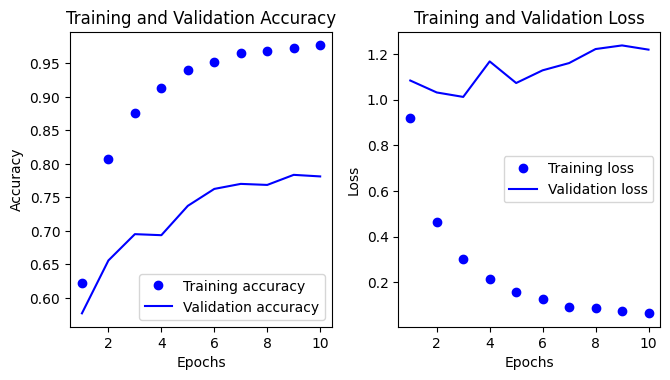

In [15]:
import matplotlib.pyplot as plt
history_dict = history.history
epochs = range(1, len(history_dict['loss']) + 1)

# Metrics to plot
metrics_names = ["accuracy",'loss']

plt.figure(figsize=(10, 7))

for i, metric in enumerate(metrics_names, 1):
    plt.subplot(2, 3, i)
    plt.plot(epochs, history_dict[metric], 'bo', label=f'Training {metric}')
    plt.plot(epochs, history_dict[f'val_{metric}'], 'b', label=f'Validation {metric}')
    plt.title(f'Training and Validation {metric.capitalize()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()

plt.tight_layout()
plt.show()

In [16]:
# Evaluate the model
loss, accuracy = model.evaluate(test_dataset.batch(32))
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

242/242 [==============================] - 146s 603ms/step - loss: 1.1899 - accuracy: 0.7840
Loss: 1.1899217367172241
Accuracy: 0.7839834094047546


In [17]:
model.save(name + ".h5")
tokenizer.save_pretrained(name + "_tokenizer")

/opt/homebrew/Caskroom/miniconda/base/envs/tf2/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


('bert_final_keywords_tokenizer/tokenizer_config.json',
 'bert_final_keywords_tokenizer/special_tokens_map.json',
 'bert_final_keywords_tokenizer/vocab.txt',
 'bert_final_keywords_tokenizer/added_tokens.json')

In [18]:
import numpy as np
predictions = model.predict(test_dataset.batch(32))
predicted_labels = np.argmax(predictions, axis=1)

# Decode class labels to original labels
decoded_predictions = label_encoder.inverse_transform(predicted_labels)

# True labels from the test set
true_labels = label_encoder.inverse_transform(test_labels)

# Create a DataFrame to compare
comparison_df = pd.DataFrame({'Text': test_texts, 'True Label': true_labels, 'Predicted Label': decoded_predictions})

/opt/homebrew/Caskroom/miniconda/base/envs/tf2/lib/python3.10/site-packages/tf_keras/src/engine/functional.py:641: UserWarning: Input dict contained keys ['token_type_ids'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


242/242 [==============================] - 150s 602ms/step


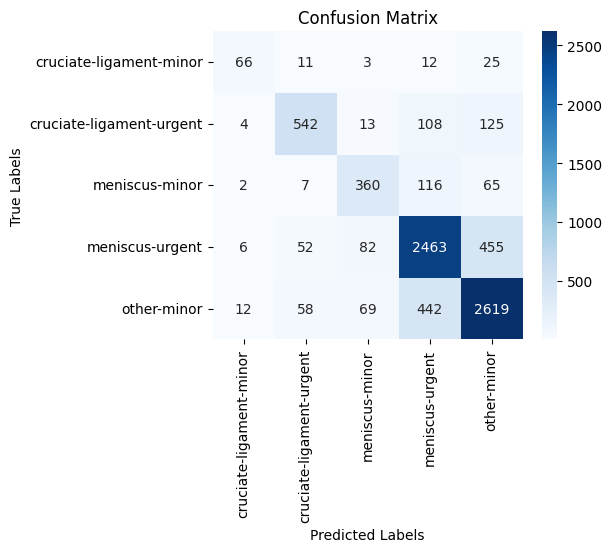

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(true_labels, decoded_predictions, labels=label_encoder.classes_)

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [20]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, decoded_predictions, target_names=label_encoder.classes_))

                          precision    recall  f1-score   support

 cruciate-ligament-minor       0.73      0.56      0.64       117
cruciate-ligament-urgent       0.81      0.68      0.74       792
          meniscus-minor       0.68      0.65      0.67       550
         meniscus-urgent       0.78      0.81      0.79      3058
             other-minor       0.80      0.82      0.81      3200

                accuracy                           0.78      7717
               macro avg       0.76      0.71      0.73      7717
            weighted avg       0.78      0.78      0.78      7717



In [21]:
from sklearn.metrics import classification_report
report = classification_report(true_labels, decoded_predictions, target_names=label_encoder.classes_, output_dict=True)

In [22]:
df = pd.DataFrame(report).transpose()
df.to_csv(name + "_report.csv")